In [1]:
from imutils import paths
import numpy as np
import shutil
import json
import cv2
import os

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_dir(dirName):
    # Create a target directory & all intermediate 
    # directories if they don't exists
    
    if not os.path.exists(dirName):
        os.makedirs(dirName, exist_ok = True)
        print("[INFO] Directory " ,dirName,  " created")
    else:
        print("[INFO] Directory " ,dirName,  " already exists") 

In [3]:
# Get paths to images and ljson labels

DATASET = "/workspace/original-external/metfaces"
imagesList = sorted(list(paths.list_images(os.path.join(DATASET, 'images'))))
jsonFile = open(os.path.join(DATASET, 'metfaces-dataset.json')) 
jsonInfo = json.load(jsonFile)
labelsDict = {}

N = len(imagesList)

In [4]:
# Save bounding box coordinates to dictionary, where the key is the image path

for info in jsonInfo:
    print(info['source_path'], info['face_spec']['rect']) 
    
    if info['source_path'] not in labelsDict.keys():
        labelsDict[info['source_path']] = [info['face_spec']['landmarks']]
    else:
        labelsDict[info['source_path']].append(info['face_spec']['landmarks'])

unprocessed/image-437831.png [611, 474, 921, 783]
unprocessed/image-11713.png [404, 238, 775, 610]
unprocessed/image-436124.png [522, 463, 1057, 998]
unprocessed/image-437086.png [584, 485, 1029, 930]
unprocessed/image-11746.png [445, 692, 816, 1064]
unprocessed/image-742415.png [651, 569, 1023, 940]
unprocessed/image-10850.png [534, 485, 980, 930]
unprocessed/image-436043.png [486, 362, 858, 734]
unprocessed/image-15127.png [321, 651, 692, 1023]
unprocessed/image-421652.png [527, 404, 899, 775]
unprocessed/image-437662.png [680, 439, 990, 749]
unprocessed/image-11973.png [542, 680, 852, 990]
unprocessed/image-12664.png [582, 522, 1117, 1057]
unprocessed/image-437918.png [758, 281, 973, 496]
unprocessed/image-13053.png [633, 485, 1079, 930]
unprocessed/image-643540.png [527, 486, 899, 858]
unprocessed/image-12819.png [445, 569, 816, 940]
unprocessed/image-459053.png [509, 452, 767, 710]
unprocessed/image-436986.png [633, 683, 1079, 1128]
unprocessed/image-15025.png [841, 825, 991, 974]

unprocessed/image-437204.png [633, 385, 1079, 831]
unprocessed/image-394547.png [509, 394, 767, 652]
unprocessed/image-336776.png [336, 385, 782, 831]
unprocessed/image-775312.png [509, 452, 767, 710]
unprocessed/image-10217.png [534, 336, 980, 782]
unprocessed/image-436214.png [663, 591, 878, 806]
unprocessed/image-436421.png [362, 445, 734, 816]
unprocessed/image-10528.png [651, 569, 1023, 940]
unprocessed/image-13204.png [651, 445, 1023, 816]
unprocessed/image-15149.png [480, 767, 738, 1025]
unprocessed/image-421473.png [659, 493, 808, 642]
unprocessed/image-547677.png [342, 912, 984, 1554]
unprocessed/image-13105.png [308, 251, 566, 509]
unprocessed/image-384104.png [595, 452, 853, 710]
unprocessed/image-12980.png [663, 305, 878, 520]
unprocessed/image-11725.png [584, 534, 1029, 980]
unprocessed/image-12812.png [751, 811, 930, 990]
unprocessed/image-10527.png [652, 492, 831, 672]
unprocessed/image-435662.png [520, 376, 735, 591]
unprocessed/image-10890.png [749, 474, 1058, 783]
unp

In [5]:
def show_image(i):
    
    # Read the image and display
    imageName = list(labelsDict.keys())[i]
    imagePath = os.path.join(DATASET, imageName)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    h, w, _ = image.shape
    image = cv2.resize(image, (int(w/2), int(h/2)))
    
    plt.figure(figsize=(8, 12), dpi=80)
    plt.imshow(image)
    
    # Read the bounding box coordinates
    for label in labelsDict[imageName]:
        landmarks = np.array(label)
        xs = min(landmarks[:,0])
        ys = min(landmarks[:,1])
        xe = max(landmarks[:,0])
        ye = max(landmarks[:,1])

        # Adjust
        h = ye-ys
        w = xe-xs
        ys -= 0.15*h

        # Display
        ax = plt.gca()
        rect = patches.Rectangle((xs, ys), xe-xs, ye-ys, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)

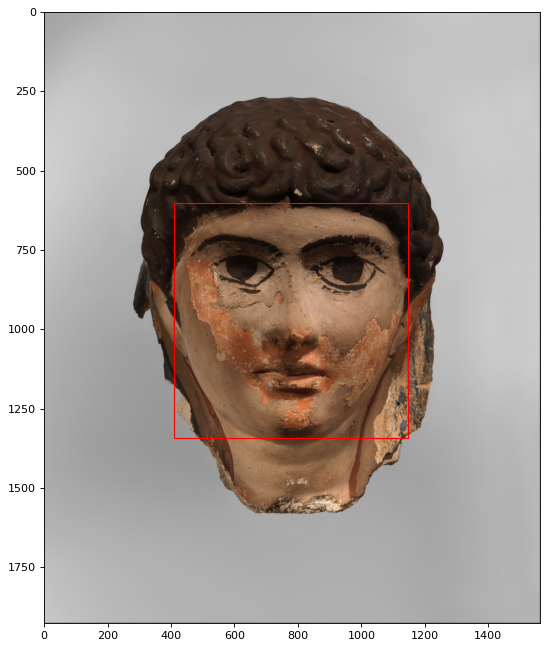

In [6]:
show_image(900)

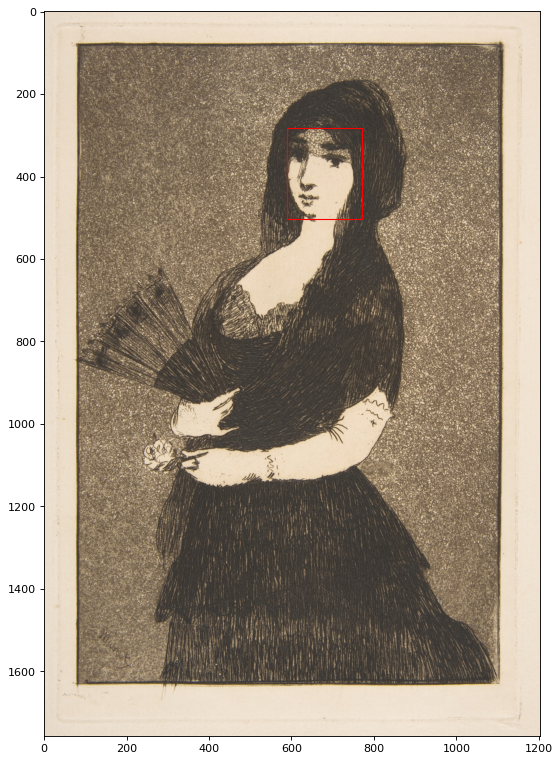

In [7]:
show_image(1000)

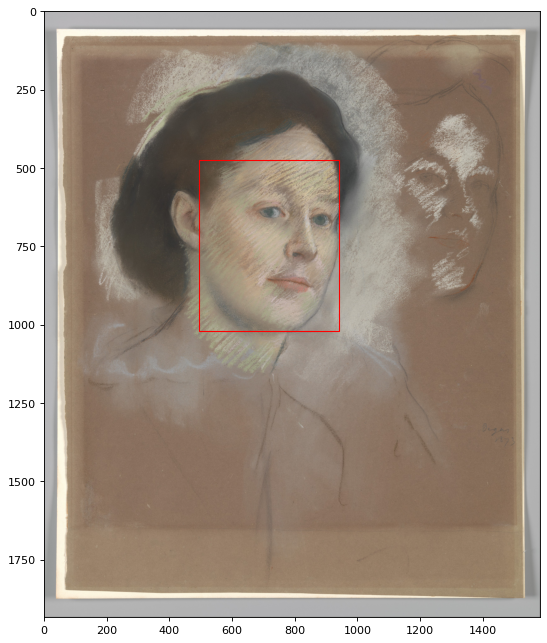

In [8]:
show_image(2)

In [9]:
# Create new directories for images and labels
NEW_DATASET = "/workspace/dataset/metfaces"
make_dir(os.path.join(NEW_DATASET, 'images'))
make_dir(os.path.join(NEW_DATASET, 'labels_eval'))

[INFO] Directory  /workspace/dataset-test/metfaces/images  created
[INFO] Directory  /workspace/dataset-test/metfaces/labels_eval  created


In [11]:
i = 1

for info in jsonInfo:
    print("Processing: {}/1336".format(i))
    
    # Get path to the image
    imageName = info['source_path']
    imagePath = os.path.join(DATASET, imageName)
        
    # new path for the image
    newImagePath = imagePath.replace(DATASET, NEW_DATASET).replace('unprocessed', 'images')

    # Read and resize the image according to json file
    image = cv2.imread(imagePath)
    shrink = int(info['face_spec']['shrink'])
    h, w, _ = image.shape
    image = cv2.resize(image, (int(w/shrink), int(h/shrink)))
    
    # Write resized image to new image path
    cv2.imwrite(newImagePath, image)
    
    # Open txt file to store bounding box info
    labelPath = imagePath.replace('png', 'txt').replace('unprocessed', 'labels_eval').replace(DATASET, NEW_DATASET)
    labelFile = open(labelPath, "a")

    # Read bounding box coordinated and adjust
    landmarks = np.array(info['face_spec']['landmarks'])
    xs = min(landmarks[:,0])
    ys = min(landmarks[:,1])
    xe = max(landmarks[:,0])
    ye = max(landmarks[:,1])

    h = ye-ys
    w = xe-xs
    ys -= 0.15*h

    # Write
    labelFile.write('face {} {} {} {} -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n'.format(int(xs), int(ys), int(xe-xs), int(ye-ys)))
    labelFile.close()
    
    i += 1

Processing: 1/1336
Processing: 2/1336
Processing: 3/1336
Processing: 4/1336
Processing: 5/1336
Processing: 6/1336
Processing: 7/1336
Processing: 8/1336
Processing: 9/1336
Processing: 10/1336
Processing: 11/1336
Processing: 12/1336
Processing: 13/1336
Processing: 14/1336
Processing: 15/1336


KeyboardInterrupt: 